In [1]:
import os, sys, re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# установка стиля matplotlib
# %matplotlib inline
# plt.style.use('ggplot')

# доступные стили отображения графика в matplotlib
# plt.style.available

# библиотека иерархической кластеризации (для построения дендрограммы) 
# from scipy.cluster import hierarchy

# библиотека для построения выпуклой оболочки множества точек 
# from scipy import spatial

# from ydata_profiling import ProfileReport         # отключено пока не "починят"
# import sweetviz as sv
# import dtale
# import statistics as stcs
# import statsmodels.stats.proportion as stsmdls

# библиотека для расчетов метрик
from scipy import stats
from sklearn import metrics

# библиотека для нормализации, стандартизации
from sklearn import preprocessing

# библиотека модели линейной регрессии
# from sklearn import linear_model

# библиотека модели деревьев решения
# from sklearn import tree

# библиотека модели ансамблей
from sklearn import ensemble

# библиотека модели кластеризации
from sklearn import cluster

# библиотека модели эллиптической кластеризации
from sklearn import mixture

# библиотека модели метода главных компонент PCA
from sklearn import decomposition

# библиотека модели TSNE
from sklearn import manifold

# библиотека clustergram-кластеризации
# from clustergram import Clustergram

# библиотека для разделения датасета
from sklearn import model_selection

# библиотека для исключения признаков RFE
# from sklearn import feature_selection

# библиотека для формирования пайплайнов
from sklearn import pipeline

# библиотека для кодирования признаков
# import category_encoders as ce

# для обработки timestamp в формате utc
import datetime, time

# работа с json
# import json
from pprint import pprint

# веб-скрэпинг сайтов
# import requests
# from bs4 import BeautifulSoup

# выводить все результаты вычислений в ячейках Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# подключить Latex
from IPython.display import Latex

# загрузка и обработка файлов
import wget, gdown, fast_unzip, rm
# import kaggle

# логгирование / логирование
import logging

# скрытие сообщений об ошибках при обработке ответов
import warnings
# игнорируем предупреждения
warnings.filterwarnings('ignore')

# библиотека для передачи функции обратного вызова
# from functools import partial

# библиотека поиска гиперпараметров hyperopt
# import hyperopt
# from hyperopt import hp, fmin, tpe, Trials

# библиотека поиска гиперпараметров optuna
# import optuna
# from optuna import Trial, study, samplers

# подключить сборщик "мусора"
import gc

# библиотека для обработки символьных переменных и операций
# import sympy as sp

# импортируем подкласс для поиска области значений / определения
# from sympy.calculus import util

# изменить формат вывода pandas
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_info_rows', 500)
# pd.set_option('display.max_info_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.large_repr', 'truncate')

In [2]:
# КОНСТАНТЫ
SRC_SUBFOLDER = './.'

# формируем относительный системный путь для импорта файлов с функциями
# если SRC_SUBFOLDER = './.' + './', получим относительный путь './../'
sys.path.append(os.path.relpath(SRC_SUBFOLDER + './'))

# импортируем внешние константы
from src.constants import *

# импортируем собственные функции
from src.funcs_1 import *
from src.funcs_2 import *
from src.funcs_3 import *

## 1. Постановка задачи

В данном проекте вы решите настоящую бизнес-задачу в области маркетинга. Вам предстоит произвести сегментацию клиентов на основе их покупательской способности, частоты совершения заказов и срока давности последнего заказа, а также определить оптимальную стратегию взаимодействия с ними.
<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из **Google Analytics** или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные / перспективные / новички / спящие / ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. 

**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**

1. Произвести предобработку набора данных.

2. Провести разведывательный анализ данных и выявить основные закономерности.

3. Сформировать категории товаров и клиентов.

4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.

5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.

## 2. Знакомство с данными. 

Первым делом необходимо понять, с какими данными нам предстоит работать, и произвести базовую предобработку данных, переведя признаки в необходимые для дальнейшей работы форматы.


Для начала давайте познакомимся с нашими данными:

In [4]:
data_url = 'https://drive.google.com/file/d/1Axlknf1Rd6T6UFRzWWZA_gBbfN2g9r3v/view?usp=sharing'
data_file = DATA_SUBFOLDER + './data/customer_segmentation_project.csv'

if os.path.isfile(data_file) == False:
    gdown.download(url=data_url, output=data_file, quiet=True, fuzzy=True)

data = pd.read_csv(
    DATA_SUBFOLDER + './data/customer_segmentation_project.csv', 
    encoding='ISO-8859-1', 
    dtype={'CustomerID': str,'InvoiceID': str}
)

# выводим результат
print(f'Размер датафрейма: {data.shape}')
data.head(5)

Размер датафрейма: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Итак, у нас есть данные о более чем полумиллионе транзакций. Каждая из них описывается следующими признаками:

* *InvoiceNo* — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* *Stock Code* — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* *Description* — название товара;
* *Quantity* — количество каждого товара за транзакцию; 
* *InvoiceDate* — дата и время выставления счёта/проведения транзакции;
* *UnitPrice* — цена за единицу товара в фунтах стерлингов;
* *CustomerID* — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* *Country* — название страны, в которой проживает клиент.

Проведём анализ структуры таблицы.

In [5]:
# прибираемся немного
del data_url, data_file
gc.collect();

### Задание 2.1

Сколько столбцов в данных кодируются числовыми типами (*int* / *float*)?

In [6]:
# ответ на вопрос
print(f"Столбцов числового типа: " \
    f"{len(data.select_dtypes(exclude='object').columns)}")

Столбцов числового типа: 2


### Задание 2.2

Выберите столбцы, в которых есть хотя бы один пропуск:

* *InvoiceNo*
* *StockCode*
* ***Description*** (True)
* ***CustomerID*** (True)
* *Country* 

In [7]:
# формируем вспомогательную таблицу
cols_null_sum = data.isnull().sum()

# ответ на вопрос
print(f"Столбцы, в которых есть хотя бы один пропуск: " \
    f"{list(cols_null_sum[cols_null_sum > 0].index)}")

Столбцы, в которых есть хотя бы один пропуск: ['Description', 'CustomerID']


In [8]:
# прибираемся немного
del cols_null_sum
gc.collect();

### Задание 2.3

Судя по описанию задачи, нам должны были предоставить данные за годовой период — проверим, так ли это.

Преобразуйте столбец *InvoiceDate* в формат **datetime**.
Укажите, за какой промежуток времени представлены данные:

* **2010-12-01 to 2011-12-09** (True)
* 2011-12-01 to 2012-12-09
* 2010-01-01 to 2011-01-09
* 2020-12-01 to 2021-12-09

In [9]:
# преобразуем признак в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# ответ на вопрос
print(f"Данные в датасете с : {data['InvoiceDate'].dt.date.min()}")
print(f"Данные в датасете по: {data['InvoiceDate'].dt.date.max()}")

Данные в датасете с : 2010-12-01
Данные в датасете по: 2011-12-09


### Задание 2.4

1) Каково максимальное количество товаров в заказе (*Quantity*)? Ответ **приведите в виде целого числа**.

2) Каково минимальное количество товаров в заказе (*Quantity*)? Ответ **приведите в виде целого числа**.

3) Сколько, согласно данным, стоит самый дешёвый товар (за исключением товаров с отрицательной стоимостью)?

In [10]:
# ответ на вопрос
print(f"Максимальное количество товаров в заказе: {data['Quantity'].max()}")
print(f"Минимальное количество товаров в заказе: {data['Quantity'].min()}")
print(f"Cамый дешёвый товар стоит: {data[data['UnitPrice'] >=0 ]['UnitPrice'].min()} £")

Максимальное количество товаров в заказе: 80995
Минимальное количество товаров в заказе: -80995
Cамый дешёвый товар стоит: 0.0 £


### Задание 2.5

1) Сколько уникальных клиентов покупали товары за период выгрузки датасета?

2) Сколько уникальных стран содержится в столбце *Country* (исключая специальный код '*Unspecified*', обозначающий неопределенную страну)?

3) Укажите идентификатор самого популярного товара (*StockCode*):

* **85123A** (True)
* 64812
* 51242
* 24151B

In [11]:
# ответ на вопрос
print(f"Число уникальных клиентов: {data['CustomerID'].nunique()}")
print(f"Число уникальных стран (исключая 'Unspecified'): " \
    f"{data[data['Country'] != 'Unspecified']['Country'].nunique()}")
print(f"Идентификатор самого популярного товара: {data['StockCode'].mode().iloc[0]}")

Число уникальных клиентов: 4372
Число уникальных стран (исключая 'Unspecified'): 37
Идентификатор самого популярного товара: 85123A


## 3. Предобработка и очистка данных

На этом этапе нам предстоит подготовить наш датасет для дальнейшего моделирования, произведя очистку данных.


### Задание 3.1

Начнем с пропусков. 

1) Сколько всего в таблице пропущенных значений?

2) Пропуски в столбце с идентификатором клиента и описанием товара свидетельствуют о некорректных/незавершённых транзакциях.

Удалите строки, содержащие пропуски в этих столбцах. Сколько строк осталось в таблице?

In [12]:
# ответ на вопрос
print(f'Всего пропущенных значений: {data.isna().sum().sum()}')

# удаляем пропуски
data.dropna(inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Всего пропущенных значений: 136534
Осталось строк после очистки: 406829


### Задание 3.2

Следом за пропусками проверим наличие дубликатов.

1) Сколько в таблице полностью дублирующихся записей?

2) Удалите дубликаты из таблицы. Сколько строк осталось?

In [13]:
# ответ на вопрос
print(f'Полностью дублирующихся записей: {data.duplicated().sum()}')

# удаляем дубликаты, сбрасываем индексы
data.drop_duplicates(inplace=True, ignore_index=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Полностью дублирующихся записей: 5225
Осталось строк после очистки: 401604


Ранее мы заметили, что в столбце с количеством товара есть отрицательные значения. Давайте разберемся, откуда они взялись. Выведем первые 5 строк таблицы, в которой столбец *Quantity* меньше 0.

In [14]:
# формируем датафрейм
negative_quantity = data[(data['Quantity'] < 0)]

# ответ на вопрос
print(f'Число записей с отрицательным значением: {negative_quantity.shape[0]}')

# выводим результат
negative_quantity.head()

Число записей с отрицательным значением: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


### Задание 3.3

Давайте проверим, что все записи из таблицы с отрицательным количеством товара действительно являются возвратными транзакциями. Если транзакция не является возвратом, но содержит отрицательное количество товара, это будет поводом считать её выбросом.

Сколько транзакций из таблицы **negative_quantity** не содержат в номере заказа признак возврата?

In [15]:
# задаём инвертированную маску для True-значений, т.е. False, 
# ищем совпадения по наличию вхождения символа 1 раз в начале строки
neg_qty_mask = negative_quantity['InvoiceNo'].str.match(r"^[C|c]{1}") == True

# ответ на вопрос
print(f"Число транзакций НЕ содержащих признак возврата: " \
    f"{negative_quantity[~neg_qty_mask]['InvoiceNo'].sum()}")

Число транзакций НЕ содержащих признак возврата: 0


In [16]:
# прибираемся немного
del neg_qty_mask
gc.collect();

Давайте подробнее разберёмся с возвратами. Сейчас на каждый уникальный товар заведена отдельная строка в таблице — это мешает определить общее количество возвратов.

Чтобы подсчитать число возвратов, сначала необходимо определить, сколько уникальных товаров указано в транзакции (корзине / basket) для каждой уникальной пары «клиент-заказ»:

In [17]:
# формируем датафрейм
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns={'InvoiceDate':'Number of Products'})

# выводим результат
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of Products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


### Задание 3.4

Добавьте во вспомогательную таблицу **nb_products_per_basket** признак отмены заказа (*Order_Canceled*): он равен 1, если транзакция является возвратом, и 0 — в противном случае.

Сколько процентов заказов в таблице являются возвратами? Ответ **приведите в виде целого числа**.

In [18]:
# формируем датафрейм
nb_products_per_basket['Order_Canceled'] = \
    nb_products_per_basket['InvoiceNo'].apply(lambda x: 1 if re.findall(r"^[C|c]{1}", x) else 0)

# ответ на вопрос
print(f"Доля клиентов отменивших заказ: " \
    f"{int(round(nb_products_per_basket['Order_Canceled'].value_counts(normalize=True) * 100).iloc[1])} %")

Доля клиентов отменивших заказ: 16 %


Давайте поближе взглянем на отмененные заказы:


In [19]:
nb_products_per_basket[nb_products_per_basket['Order_Canceled']==1].head()

,CustomerID,InvoiceNo,Number of Products,Order_Canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


In [20]:
# список клиентов с 2-мя транзакциями
# list_3_4 = list(nb_products_per_basket['CustomerID'].unique())
# list_accum = []
# for client in list_3_4:
#     if data[data['CustomerID'] == client].shape[0] == 2:
#         list_accum.append(client)

Найдем в таблице со всеми транзакциями записи принадлежащие клиенту с идентификатором 12346:


In [21]:
data[data['CustomerID'] == '12346']
data[data['CustomerID'] == '16073']
data[data['CustomerID'] == '17747']
data[data['CustomerID'] == '18133']
data[data['CustomerID'] == '18268']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
37511,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
37516,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
57773,544078,22360,GLASS JAR ENGLISH CONFECTIONERY,48,2011-02-15 15:41:00,2.55,16073,United Kingdom
61809,C544558,22360,GLASS JAR ENGLISH CONFECTIONERY,-11,2011-02-21 12:33:00,2.55,16073,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
219046,563740,22106,MIRROR MOSAIC HURRICANE LAMP,12,2011-08-19 08:13:00,5.95,17747,United Kingdom
229107,C564947,22106,MIRROR MOSAIC HURRICANE LAMP,-1,2011-08-31 13:29:00,6.75,17747,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
128794,552833,23167,SMALL CERAMIC TOP STORAGE JAR,1350,2011-05-11 14:14:00,0.69,18133,United Kingdom
130282,C552995,M,Manual,-1350,2011-05-12 15:19:00,0.16,18133,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
198837,C561590,84968A,SET OF 16 VINTAGE ROSE CUTLERY,-2,2011-07-28 11:16:00,12.75,18268,United Kingdom
199939,561680,84968A,SET OF 16 VINTAGE ROSE CUTLERY,2,2011-07-28 19:13:00,12.75,18268,United Kingdom


Итак, вот пример пары «заказ-отмена». Обратите внимание на столбцы StockCode, UnitPrice, CustomerID и Quantity, сравните их для двух транзакций. 

In [22]:
# прибираемся немного
del temp, nb_products_per_basket
gc.collect();

### Задание 3.5

Выдвигаем гипотезу: для каждой отменённой транзакции в базе данных (таблица **data**) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара.

Верна ли гипотеза?

* Да, верна
* **Нет, не верна** (True)

In [23]:
get_hypothesis(negative_quantity)

Гипотеза не верна


Давайте приведем контр-пример, на котором "споткнулась" наша прошлая гипотеза. Посмотрим на клиента с идентификатором 14527:

In [24]:
data[data['CustomerID'] == '14527'].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
6521,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527,United Kingdom
6522,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527,United Kingdom
6523,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527,United Kingdom
6524,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527,United Kingdom


Обратите внимание на первую строку, в которой располагается заказ C536379 с признаком отмены — противоположных ему аналогов по количеству товаров вы не найдёте. Причина кроется в типе товара: данный товар обозначен как товар со скидкой (*StockCode*), и, по-видимому, для таких транзакций нет аналогов с положительным числом товаров в заказе. Учтём это наблюдение на будущее.

### Задание 3.6
Выдвигаем новую гипотезу: для каждой отменённой транзакции в базе данных (таблица **data**) существует её аналог с тем же кодом товара, идентификатором клиента и противоположным значением количества товара, если на товар не распространяются скидки.

Верна ли гипотеза?
* Да, верна
* **Нет, не верна** (True)

In [25]:
get_hypothesis(negative_quantity[negative_quantity['StockCode'] != 'D'])

Гипотеза не верна


Посмотрим, где кроется наша проблема. В качестве контр-примера приведем транзакции, относящиеся к клиенту с идентификатором 15311 и товаром под кодом 35004C:


In [26]:
data[(data['CustomerID'] == '15311') & (data['StockCode'] == '35004C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
6750,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-05 13:55:00,4.65,15311,United Kingdom
11855,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-08 13:18:00,4.65,15311,United Kingdom
18214,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2010-12-13 15:07:00,4.65,15311,United Kingdom
25143,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,2010-12-20 15:27:00,4.65,15311,United Kingdom
27303,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-05 11:41:00,4.65,15311,United Kingdom
37034,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,2011-01-17 13:39:00,4.65,15311,United Kingdom
48630,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2011-02-01 12:14:00,4.65,15311,United Kingdom


* На первой строке мы видим заказ с отменой (номер заказа начинается с символа *C*). Однако возникает вопрос: на какой заказ пришла эта отмена, ведь более ранних записей о транзакциях, связанных с этим клиентом, нет.
Ответ состоит в том, что заказ на покупку данного товара от клиента поступил раньше декабря 2010 года, а этих данных в нашей таблице нет. Это очень популярная проблема, которая возникает практически при любой работе с транзакциями: есть только фрагмент из общих данных, однако неизвестно, что предшествовало этому фрагменту.

* По двум следующим строкам видно, что клиент может отменить не весь заказ, а только его часть (5 декабря клиент покупает 12 единиц товара, а 8 декабря оформляет возврат только на одну единицу товара). Мы должны принять это во внимание на будущее

Итак, теперь мы знаем все особенности отмены заказов. При сегментировании клиентов мы будем определять их покупательскую способность, а для этого очень важно учитывать возвраты товаров. Поэтому давайте создадим в данных о транзакциях признак *QuantityCanceled*, который будет указывать на количество возвращённого впоследствии товара для каждой транзакции. 

Сразу обговорим, что мы не будем учитывать сложные пограничные случаи:

1. Отменённая транзакция не имеет противоположной (на транзакцию-возврат не нашлось ни одной транзакции на покупку).

2. Количество возвращённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом).


Мы подготовили для вас функцию **get_quantity_canceled()**. Она принимает на вход таблицу с транзакциями и возвращает объект *Series* — столбец, в котором указано количество возвращённого впоследствии товара для каждой транзакции. На основе результата работы этой функции мы создаём в таблице с транзакциями новый столбец *QuantityCanceled*.


In [28]:
%%time
# формируем данные с помощью функции
data['QuantityCanceled'] = get_quantity_canceled(data, negative_quantity)

CPU times: total: 4min 55s
Wall time: 4min 56s


### Задание 3.7

Подсчитайте суммарное количество отмененных товаров в столбце *QuantityCanceled*. 

In [29]:
# ответ на вопрос
print(f"Суммарное количество отменённых товаров: " \
    f"{int(data['QuantityCanceled'].sum())} ед.")

Суммарное количество отменённых товаров: 245266 ед.


### Задание 3.8

Теперь, когда мы разобрались с транзакциями-возвратами, они больше нам не понадобятся.<br> 
Удалите из таблицы транзакции, в поле которых указано отрицательное количество товара.

Сколько записей осталось?

In [30]:
# удаляем операции с отрицательным количеством товара
data.drop(index=negative_quantity.index, inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Осталось строк после очистки: 392732


Следующая проблема — это специальные виды транзакций. Например, ранее мы уже видели, что для товаров со скидкой признак *StockCode* обозначен как '*D*'. Давайте проверим, бывают ли другие специальные коды.


In [31]:
# прибираемся немного
del negative_quantity
gc.collect();

### Задание 3.9

С помощью регулярных выражений найдите такие коды товаров (*StockCode*), которые начинаются с латинских букв (при этом коды могут содержать цифры). 

Подсказка: Поиск подстрок в столбце можно организовать с помощью `str.contains()`. В качестве шаблона для поиска используйте строку `'^[a-zA-Z]+'`. Параметр **regex** установите в значение *True*.

1) Сколько уникальных специальных видов транзакций вам удалось найти?

Специальные операции не характеризуют наших клиентов, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы. 

2) Сколько записей осталось?

In [32]:
# формирование нового признака
data['SpecialTransaction'] = data['StockCode'].apply(lambda x: 1 if re.findall('^[a-zA-Z]+', x) else 0)

# ответ на вопрос
print(f"Cпециальных видов транзакций: " \
    f"{len(data[data['SpecialTransaction'] == 1]['StockCode'].unique())}")

# вывод результата
data[data['SpecialTransaction'] == 1]['StockCode'].unique().tolist()

Cпециальных видов транзакций: 6


['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']

In [33]:
# удаляем операции со специальным видом транзакции и вспомогательный признак
data.drop(index=data[data['SpecialTransaction'] == 1].index, inplace=True)
data.drop(columns=['SpecialTransaction'], inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Осталось строк после очистки: 391183


### Задание 3.10

Ранее при просмотре описательных статистик мы видели, что на некоторые товары установлена цена в 0 фунтов стерлингов. 

1) В скольких транзакциях цена за единицу товара равна 0?

2) Таких транзакций оказалось менее 1 %, поэтому от них можно просто избавиться. Удалите такие транзакции из таблицы. Сколько записей осталось?

In [34]:
# ответ на вопрос
print(f"Число транзакций с нулевой ценой за 1 ед. товара: " \
    f"{data[data['UnitPrice'] == 0].shape[0]}")

Число транзакций с нулевой ценой за 1 ед. товара: 33


In [35]:
# удаляем операции с нулевой ценой
data.drop(index=data[data['UnitPrice'] == 0].index, inplace=True)

# ответ на вопрос
print(f'Осталось строк после очистки: {data.shape[0]}')

Осталось строк после очистки: 391150


In [36]:
# сохраняем результат
data.to_csv(DATA_SUBFOLDER + './data/data_clean.csv', index=False)

Поздравляем, этап очистки данных завершён. Рекомендуем сохранить полученный результат в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.

## 4. Разведывательный анализ данных

Теперь давайте займёмся разведывательным анализом и исследуем транзакции.

Перед нами стоят следующие задачи:

* Понять, клиенты из каких стран покупают больше и чаще;

* Узнать, присутствует ли в продажах сезонность (когда покупают чаще);

* Создать новые признаки, которые в дальнейшем понадобятся при формировании датасета о клиентах.

### Задание 4.1

Для начала выясним, в каких странах живут клиенты.

Постройте график, отражающий количество клиентов в каждой из стран. Обратите внимание, что нам нужны именно уникальные клиенты.

В какой стране живёт наибольшее количество клиентов?

* **Великобритания (United Kingdom)** (True)
* Германия (Germany)
* Франция (France)
* Нидерланды (Netherlands)
* Ирландия (EIRE)
* Австралия (Australia)

In [3]:
# читаем подготовленный датасет с диска
data = pd.read_csv(
    DATA_SUBFOLDER + './data/data_clean.csv', 
    dtype={'CustomerID': str,'InvoiceID': str}
)

# преобразуем признак в формат datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

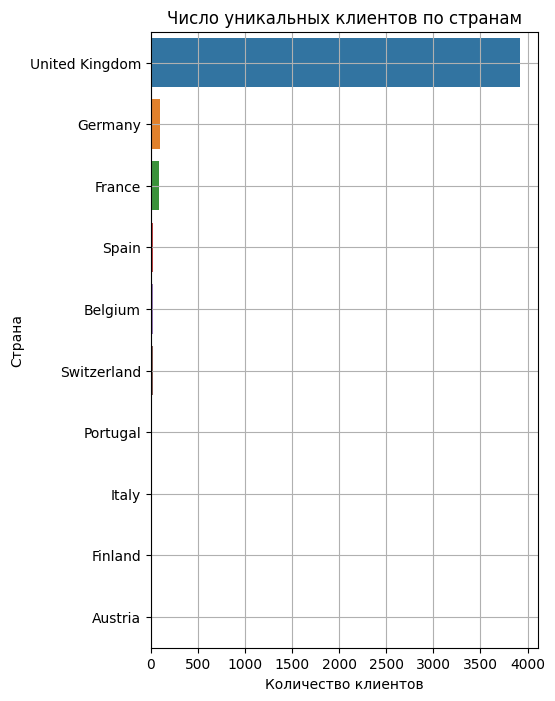

In [4]:
get_barplot(
    data, 
    'Country', 'CustomerID', 'nunique', 
    'Число уникальных клиентов по странам', 'Количество клиентов', 'Страна', 
    num_feat_=10, grid_=True
)

### Задание 4.2

Мы посмотрели на распределение клиентов в разрезе стран. А что насчёт заказов?

Постройте визуализацию и выделите топ-3 стран по количеству поступающих заказов.

* **Великобритания (United Kingdom)** (True)
* **Германия (Germany)** (True)
* **Франция (France)** (True)
* Нидерланды (Netherlands)
* Ирландия (EIRE)
* Австралия (Australia)

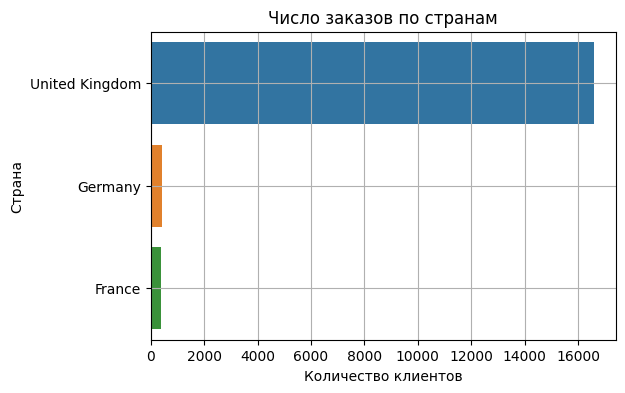

In [5]:
get_barplot(
    data, 
    'Country', 'InvoiceNo', 'nunique', 
    'Число заказов по странам', 'Количество клиентов', 'Страна', 
    num_feat_=3, 
    figsize_=(6, 4), grid_=True
)

### Задание 4.3

Давайте добавим в датасет общую цену заказа, назовём её *TotalPrice*.
Общая цена заказа рассчитывается как:

**<center> общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров). </center>**

Чему равна средняя общая стоимость заказов? Ответ приведите в фунтах стерлингов и **округлите до целого числа**.

In [6]:
# формирование нового признака
data['TotalPrice'] = data['UnitPrice'] \
    * (data['Quantity'] - data['QuantityCanceled'])

# ответ на вопрос
print(f"Cредняя общая стоимость заказов: {data['TotalPrice'].mean():.0f} £")

Cредняя общая стоимость заказов: 21 £


### Задание 4.4

Постройте визуализацию и выделите топ-3 стран, клиенты из которых приносят компании больше всего выручки:

* **Великобритания (United Kingdom)** (True)
* Германия (Germany)
* Франция (France)
* **Нидерланды (Netherlands)** (True)
* **Ирландия (EIRE)** (True)
* Австралия (Australia)

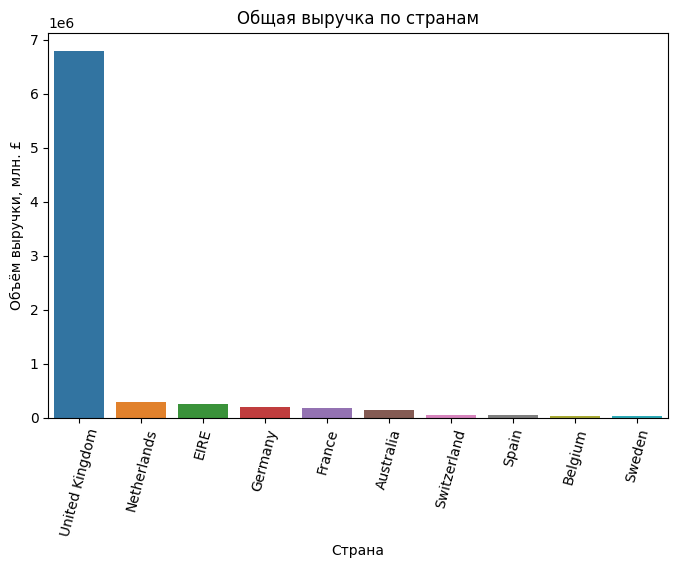

In [7]:
get_barplot(
    data, 
    'Country', 'TotalPrice', 'sum_asc', 
    'Общая выручка по странам', 'Объём выручки, млн. £', 'Страна', 
    rotate_=True, xtick_angle_=75
)

Теперь займёмся временными характеристиками.


### Задание 4.5

Добавьте в таблицу с транзакциями признаки месяца, дня недели и часа совершения покупки.

Постройте визуализацию, отражающую распределение суммарной выручки от заказов по месяцам. Укажите номер самого прибыльного для компании месяца. Предположите, почему так происходит.

In [8]:
# формирование новых признаков
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour

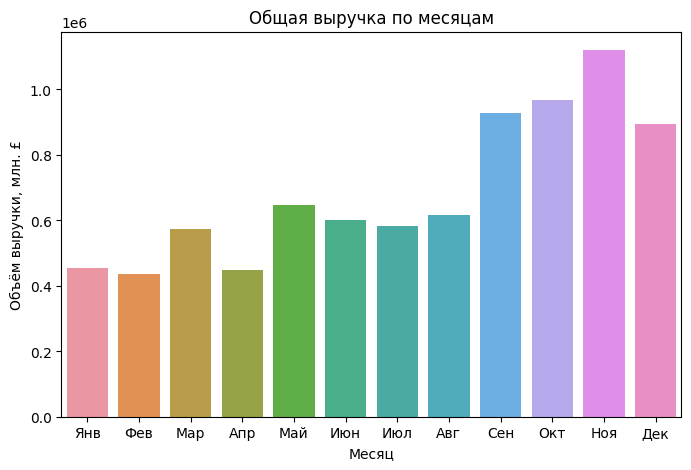

In [9]:
get_barplot(
    data, 
    'Month', 'TotalPrice', 'sum', 
    'Общая выручка по месяцам', 'Объём выручки, млн. £', 'Месяц', 
    xticks_labels_=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'], 
    rotate_=True
)

### Задание 4.6

Постройте визуализацию, отражающую распределение среднего количества заказов по дням недели. Укажите день недели, в который, согласно данным, не совершено ни одного заказа:

* Понедельник
* Вторник
* Среда
* Четверг
* Пятница
* **Суббота** (True) 
* Воскресенье

In [10]:
# формируем вспомогательный список, 
# какие дни недели образуются - для формирования списка меток
list(data.groupby('DayOfWeek')['InvoiceNo'].count().index)

['Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

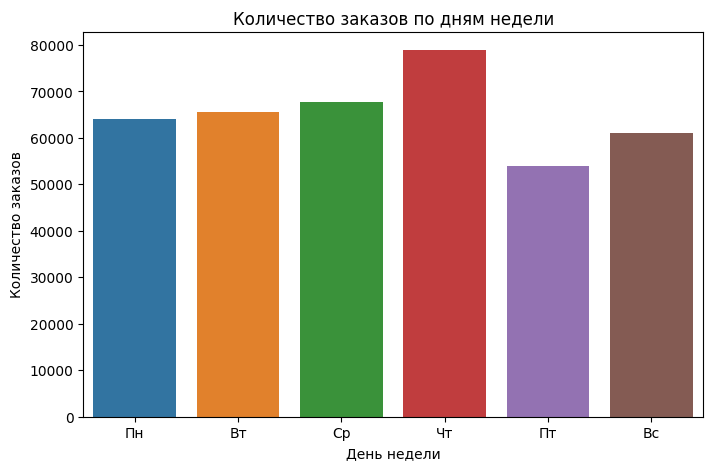

In [11]:
get_barplot(
    data, 
    'DayOfWeek', 'InvoiceNo', 'count', 
    'Количество заказов по дням недели', 'Количество заказов', 'День недели', 
    xticks_labels_=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Вс'], 
    rotate_=True
)

### Задание 4.7

Выделите дату из признака времени совершения транзакции.
Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.

Постройте визуализацию, отражающую распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции).

Выберите верные утверждения:

* Больше всего заказов совершается в дневное время в интервале от 18 до 20 часов
* **Больше всего заказов совершается в вечернее время в интервале от 10 до 15 часов** (True)
* **Начиная с 21 часа вечера и до 6 утра (не включительно) заказы не поступают** (True) 
* Заказы поступают во все периоды дня

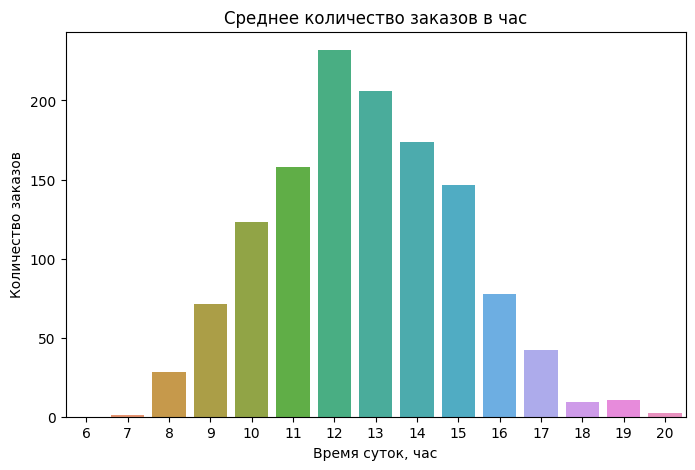

In [12]:
# формирование нового признака
data['Date'] = data['InvoiceDate'].dt.date

# строим сводную таблицу и вычисляем по ней среднее количество заказов в час
pivot_mean = data.pivot_table(
    values='StockCode',
    index='Date',
    columns='Hour',
    aggfunc='count', 
    fill_value=0
).mean()

get_barplot(
    pivot_mean, 
    '_', '_', 'pivot', 
    'Среднее количество заказов в час', 'Количество заказов', 'Время суток, час', 
    rotate_=True
)

In [13]:
# прибираемся немного
del pivot_mean
gc.collect();

## 5. RFM-сегментация клиентов: часть 1

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<!-- <center> <img src=https://miro.medium.com/max/1400/1_uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center> -->
<center> <img src='./../images/1_uYQjy9SUjW7iWHc2gGanQQ.png' align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:

* *Recency* (*Давность*) — давность последней покупки клиента;
* *Frequency* (*Частота*) — общее количество покупок клиента;
* *Monetary Value* (*Денежная ценность*) — сколько денег потратил клиент.

Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов.

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

### Задание 5.1

Итак, приступим к созданию нашей RFM-таблицы. 

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* *Recency* для $i$-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:

    $$t_0-max(t_{i1}, t_{i2},\ \dots\ ,\ t_{iM})$$

    где $t_{ij}$ — дата и время совершения $i$-ым клиентом своей $j$-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате **datetime** — `'2011-12-10 00:00:00'`).

* *Frequency* рассчитывается как общее количество уникальных заказов, которые совершил $i$-ый клиент.
* *Monetary Value* рассчитывается как общая сумма денег, которую $i$-ый клиент потратил на наши товары (с учетом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [14]:
# вычисляем давность последних покупок клиента
recency = data['Date'].max() - data.groupby('CustomerID')['Date'].max()

# вычисляем общее количество покупок клиента
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

# вычисляем сколько суммарно принёс прибыли каждый клиент
monetary = data.groupby('CustomerID')['TotalPrice'].sum()

# создаём RFM-таблицу
rfm_table = pd.DataFrame({
        'Recency': recency.values,
        'Frequency': frequency.values,
        'Monetary': monetary.values
    },
    index = recency.index
)

# понижаем размерность признаков по типу занимаемых данных
rfm_table['Recency'] = rfm_table['Recency'].dt.days
rfm_table[['Recency', 'Frequency']] = rfm_table[['Recency', 'Frequency']].astype('int16')

# выводим результат
rfm_table.head(3)
rfm_table.shape

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24


(4334, 3)

1) Сколько клиентов совершили покупку более 200 дней назад?

2) Сколько заказов в среднем делает клиент (за представленный годовой период)? Ответ **округлите до целого числа**.

3) Чему равна общая сумма денег, которую потратил клиент с идентификатором 12360? Ответ приведите в фунтах стерлингов и **округлите до целого числа**.



In [15]:
# ответ на вопрос
print(f"{rfm_table[rfm_table['Recency'] > 200].shape[0]} " \
    f"клиента совершили покупку более 200 дней назад")

print(f"{round(rfm_table['Frequency'].mean())} " \
    f"заказа в среднем за год делает каждый клиент")

print(f"Общая сумма, которую потратил клиент с ID 12360: " \
    f"{round(rfm_table.loc['12360']['Monetary'])} £")

743 клиента совершили покупку более 200 дней назад
4 заказа в среднем за год делает каждый клиент
Общая сумма, которую потратил клиент с ID 12360: 2302 £


In [16]:
# прибираемся немного
del data, recency, frequency, monetary
gc.collect();

Теперь давайте взглянем на коробчатые диаграммы для каждого из признаков:

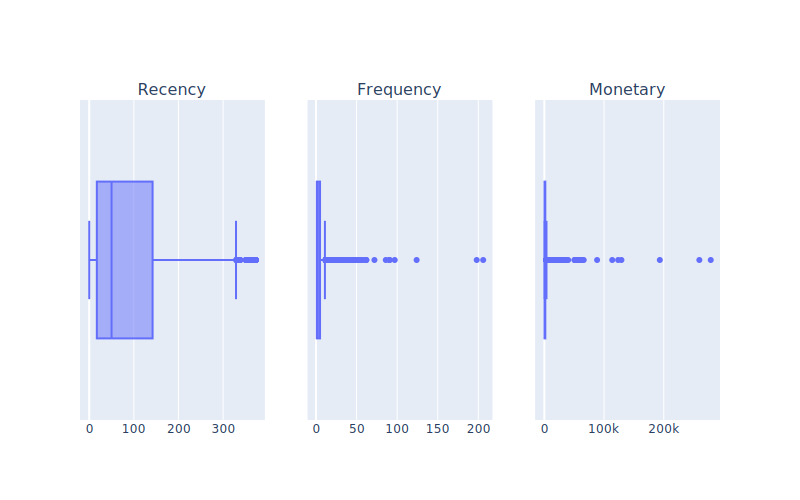

In [17]:
get_boxplot(rfm_table, './images/boxplot_5_1.svg')

<!-- ![Alt text](./../images/boxplot_5_1.svg) -->

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра *Frequency* или параметра *Monetary* выше, чем у 95 % клиентов.

### Задание 5.2

Удалите из RFM-таблицы записи о клиентах, для которых выполняется хотя бы одно из условий:

$$frequency >frequency_{0.95}$$

$$monetary >monetary_{0.95}$$ 

где $frequency_{0.95}$ и $monetary_{0.95}$ - квантили уровня 0.95 для соответствующих признаков. 

Данные о скольких клиентах у вас остались в RFM-таблице?

In [18]:
# задаём пороговые маски
mask_frequency = rfm_table['Frequency'] <= rfm_table['Frequency'].quantile(0.95)
mask_monetary = rfm_table['Monetary'] <= rfm_table['Monetary'].quantile(0.95)

# формируем датафрейм
rfm_table_cleaned = rfm_table[mask_frequency & mask_monetary]

# ответ на вопрос
print(f'Осталось строк после очистки: {rfm_table_cleaned.shape[0]}')

Осталось строк после очистки: 4044


In [19]:
# прибираемся немного
del rfm_table, mask_frequency, mask_monetary
gc.collect();

После удаления выбросов у вас должны получиться следующие коробчатые диаграммы:


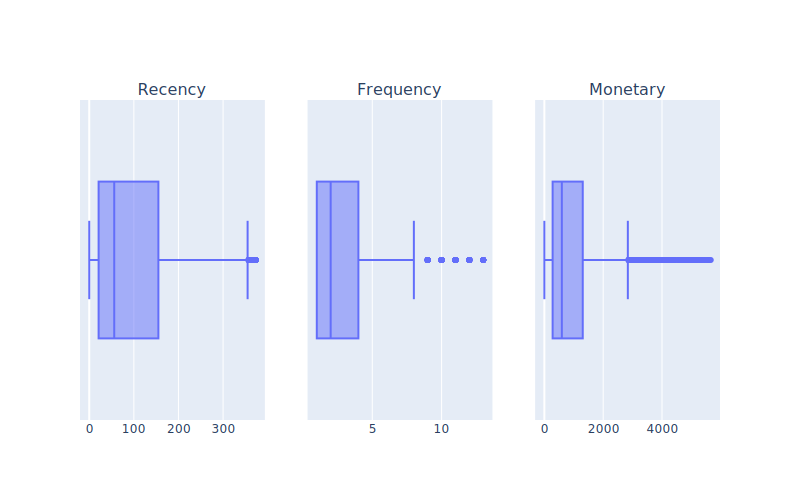

In [20]:
get_boxplot(rfm_table_cleaned, './images/boxplot_5_2.svg')

<!-- ![Alt text](./../images/boxplot_5_2.svg) -->

Мы наконец добрались до этапа кластеризации. Для начала нам необходимо оценить, как распределены наблюдения в пространстве признаков. Благо, у нас всего три параметра, по которым мы хотим кластеризовать клиентов, поэтому данные можно визуализировать в виде трёхмерной диаграммы рассеяния. 

Построим визуализацию нашего трёхмерного пространства признаков:


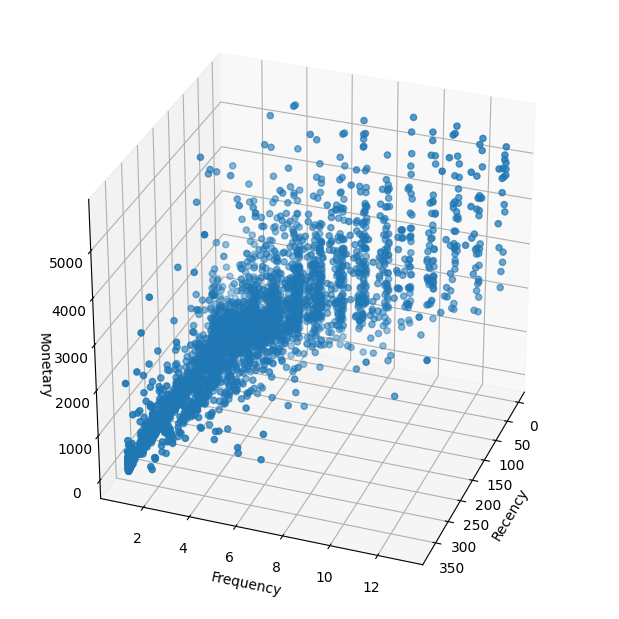

In [21]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6, 6))
ax_scatter_3d = mplot3d.Axes3D(fig)

# добавим дополнительную ось в объект картинки
fig.add_axes(ax_scatter_3d)

# вписываем (масштабируем) объект
ax_scatter_3d.set_box_aspect(aspect=(5, 5, 5), zoom=0.95)

# повернём график
ax_scatter_3d.azim = 20
ax_scatter_3d.elev = 30

# визуализируем данные, передав значения x, y, z, 
# а также информацию о группировке данных по цветам
ax_scatter_3d.scatter(
    rfm_table_cleaned['Recency'].to_list(), 
    rfm_table_cleaned['Frequency'].to_list(),
    rfm_table_cleaned['Monetary'].to_list()
)

# добавим подписи осей
ax_scatter_3d.set(
    xlabel='Recency', 
    ylabel='Frequency', 
    zlabel='Monetary'
);


In [22]:
# прибираемся немного
del fig, ax_scatter_3d
gc.collect();

Что здесь можно увидеть? На самом деле, ничего конкретного. Да, видно, что есть клиенты с большими значениями параметров *Monetary* и *Frequency* — вероятно, это лучшие клиенты, которые покупают чаще всего и приносят больше всего денег. Однако по общей массе точек сложно сказать, сколько кластеров у нас есть — скорее даже кажется, что пространство не поддаётся кластеризации.

Давайте призовём на помощь методы снижения размерности.

### Задание 5.3

Начнём с метода главных компонент (*PCA*). Нам известно, что для его стабильной работы данные необходимо стандартизировать/нормализовать. 

Давайте для удобства обернём эти шаги по предобработке данных в **pipeline**.

Создайте **pipeline**, в котором будут следующие шаги:

* стандартизация с помощью *StandardScaler* с параметрами по умолчанию;
* метод главных компонент с двумя компонентами.

Обучите ваш **pipeline** на RFM-таблице, очищенной от выбросов, и примените к ней трансформацию.

Какую долю дисперсии исходных данных объясняет первая главная компонента? Ответ **округлите до двух знаков после точки-разделителя**.

In [23]:
# формируем пайплайн для пакетной обработки, 
# задаём в конвейере объекты класса StandardScaler, PCA
PL_5_3 = get_estimator('pipe_pca', **{'n_components':2})

# применяем пайплайн, кодируем признаки, 
# обучаем модель, трансформируем признаки
rfm_table_processed = PL_5_3.fit_transform(rfm_table_cleaned)

# доля дисперсии первой компоненты
print(f"Доля дисперсии первой главной компоненты: " \
    f"{PL_5_3['pca'].explained_variance_ratio_[0]:.2f}")

Доля дисперсии первой главной компоненты: 0.68


In [24]:
# прибираемся немного
del PL_5_3
gc.collect();

Визуализировав пространство главных компонент после декомпозиции мы получим следующую картину:

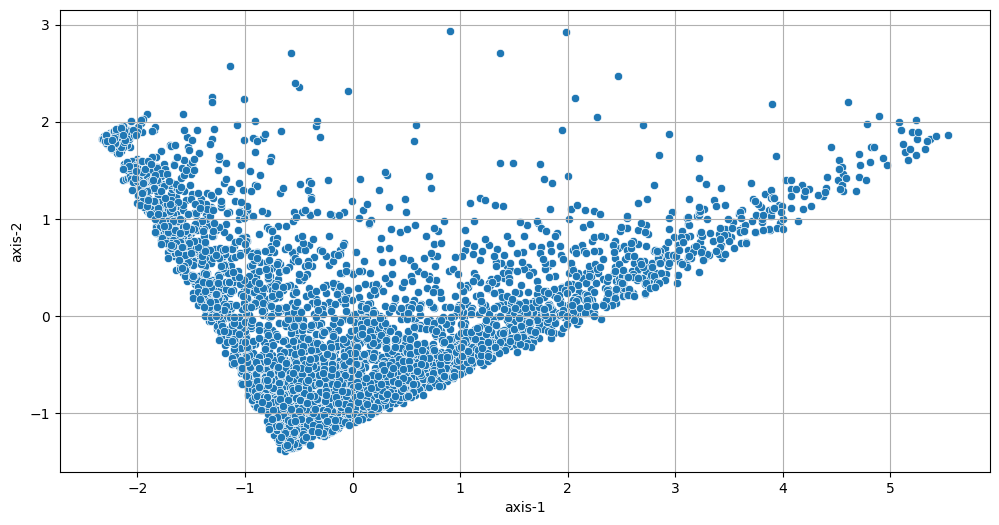

In [25]:
# формируем датафрейм
rfm_table_processed = pd.DataFrame(
    rfm_table_processed, 
    columns=['axis-1', 'axis-2'], 
)

# строим график
get_scatterplot(rfm_table_processed, True)

Попробуем разделить это пространство главных компонент на сегменты. 

### Задание 5.4

Попробуем воспользоваться методом *k-means*. 

Подберите оптимальное количество кластеров для метода *k-means* с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. 

В качестве значения параметра **random_state** возьмите число **42**. Остальные параметры оставьте по умолчанию.

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ **округлите до двух знаков после точки-разделителя**.

,metric,silhouette_score
1,0.52423,3


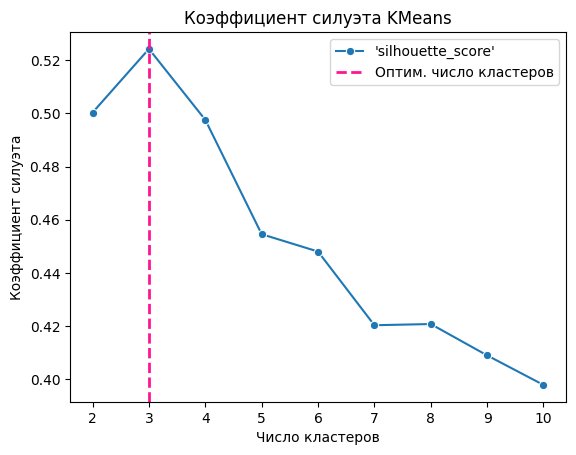

In [26]:
# формируем данные с помощью функции
si_5_4 = get_opt_metric_coef(
    'kmeans', 'si', 2, 10, rfm_table_processed
)
si_5_4

### Задание 5.5

Теперь возьмём *EM*-алгоритм.

Подберите оптимальное количество кластеров для *EM*-алгоритма (*GaussianMixture*) с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно.
В качестве значения параметра **random_state** возьмите число **42**. Остальные параметры оставьте по умолчанию

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ **округлите до двух знаков после точки-разделителя**.

,metric,silhouette_score
1,0.436061,3


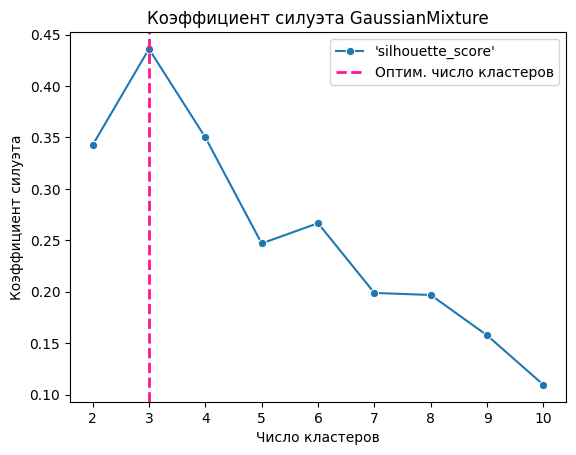

In [27]:
get_opt_metric_coef(
    'em', 'si', 2, 10, rfm_table_processed
)

### Задание 5.6

Давайте посмотрим на распределение кластеров.

1) Сначала нужно определить лучшую модель. Для какой модели с оптимальным количеством кластеров коэффициент силуэта наибольший?

    * **K-Means** (True)
    
    * GaussianMixture
    <br><br>

2) Обучите лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных.

Сколько клиентов попало в самый большой кластер?

In [28]:
# создаём объект класса KMeans, обучаем модель, предсказываем метки классов
KM_5_6 = get_estimator('kmeans', **{'n_clusters':int(si_5_4.iloc[0, 1])})
KM_5_6_label_ = KM_5_6.fit_predict(rfm_table_processed)

# присоединяем предсказанные метки в rfm_table_cleaned
rfm_table_cleaned['KM_label'] = KM_5_6_label_

Визуализируем результаты кластеризации:

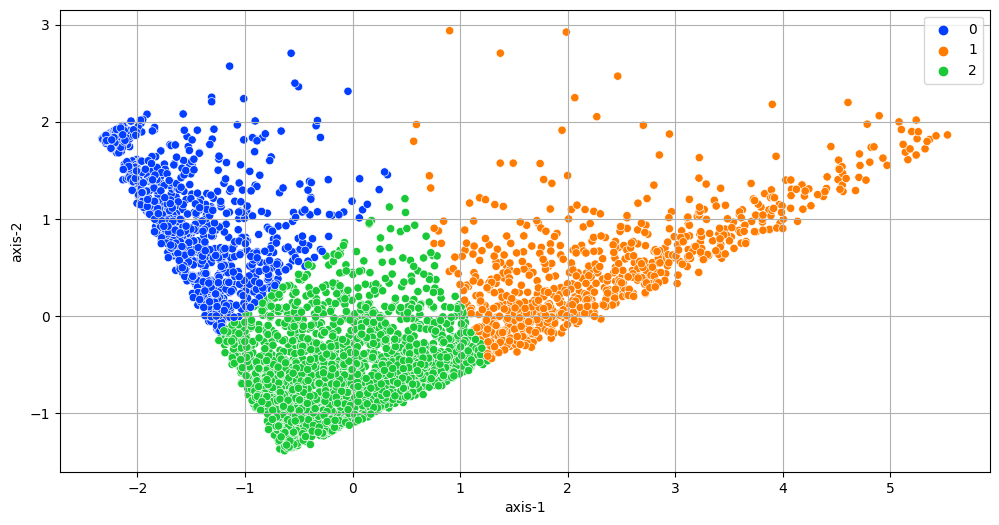

In [29]:
get_scatterplot(rfm_table_processed, True, KM_5_6_label_)

In [30]:
# ответ на вопрос
print(f"Число клиентов в самом большом кластере: " \
    f"{rfm_table_cleaned.groupby('KM_label')['Frequency'].count().nlargest(1).iloc[0]} чел.")

Число клиентов в самом большом кластере: 2269 чел.


In [31]:
# прибираемся немного
del si_5_4, KM_5_6, KM_5_6_label_
gc.collect();

Итак, у нас есть три сегмента клиентов. Давайте попробуем составить профиль для этих сегментов.

### Задание 5.7

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице, очищенной от выбросов.  Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чему равно максимальное среднее значение признака *Frequency* в полученной таблице? Ответ **округлите до целого числа**.

In [32]:
# группируем RFM-таблицу и рассчитываем среднее
rfm_by_cluster_mean_val_5_7 = rfm_table_cleaned.groupby('KM_label').mean()
rfm_by_cluster_mean_val_5_7.astype('int')

# ответ на вопрос
print(f"Максимальное среднее значение 'Frequency': " \
    f"{round(rfm_by_cluster_mean_val_5_7['Frequency'].max())}")

,Recency,Frequency,Monetary
KM_label,,,
0,253,1,386
1,31,7,2657
2,51,2,660


Максимальное среднее значение 'Frequency': 7


### Полярная диаграмма
Сейчас мы познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная, или лепестковая, диаграмма). Это графическое представление значений нескольких эквивалентных категорий в форме «паутины».
**Radar Chart** очень часто используется в контексте определения профиля кластеров. На концах «паутины» откладываются оси, которые соответствуют признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<center>

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

</center>

На данной диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие к данному кластеру, в большей степени увлекаются музыкой (*Music*), а в меньшей степени — программированием (*Programm*).

В модуле **graph_objects** библиотеки ***plotly*** есть встроенная функция *Scatterpolar*, которая позволяет построить полярную диаграмму. На основе этой функции мы реализовали собственную функцию **plot_cluster_profile()**, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У этой функции основной параметр: **grouped_data** — сгруппированные по кластерам характеристики объектов (клиентов). 

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в реализацию функции **plot_cluster_profile()**.

Теперь у нас есть удобный инструмент для анализа профиля кластеров. Давайте воспользуемся им.

### Задание 5.8

Визуализируйте профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера. 

Проанализируйте кластеры и на основе анализа сопоставьте номер кластера и его описание.

Описание кластера:
* Кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая - **кластер 1**.

* Кластер соответствует «промежуточным» клиентам, которые являются активными, но покупают не так часто и много, как лояльные клиенты. В то же время эти клиенты не являются «потерянными» - **кластер 2**.

* Кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена очень давно - **кластер 0**.

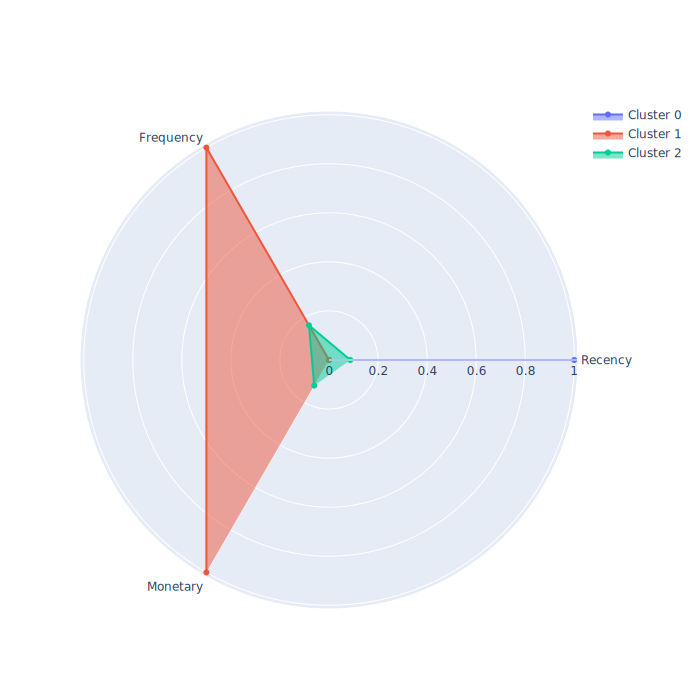

In [33]:
plot_cluster_profile(rfm_by_cluster_mean_val_5_7, './images/scatterpolar_5_8.svg', 700)

In [34]:
# прибираемся немного
del rfm_by_cluster_mean_val_5_7
gc.collect();

## 6. RFM-сегментация клиентов: часть 2

Итак, с помощью RFM-анализа нам удалось выделить три сегмента клиентов. Однако в маркетинге принято оперировать большим их количеством: обычно маркетологи стараются создать стратегию хотя бы для пяти-семи клиентских сегментов в градации от «лояльных» до «потерянных» с промежуточными категориями.

Поэтому, получив обратную связь от маркетологов, мы вновь принимаемся за работу, пытаясь модифицировать полученное решение.

Ранее мы производили кластеризацию в пространстве главных компонент. Вспомним, что *PCA* является линейным методом отображения исходного пространства признаков в его сжатую версию.

А что если использовать нелинейную трансформацию? Например, алгоритм снижения размерности *t-SNE*. Давайте попробуем и посмотрим, что получится.

### Задание 6.1

Воспользуемся алгоритмом *t-SNE* и трансформируем RFM-таблицу, очищенную от выбросов, в двухмерное представление. Также заранее позаботимся о масштабировании признаков.

Давайте для удобства обернём шаги по предобработке данных в **pipeline**.

Создайте **pipeline**, который будет содержать следующие шаги:
* стандартизация с помощью *StandardScaler* с параметрами по умолчанию; 
* алгоритм *t-SNE* с двумя компонентами, параметрами **perplexity=50** и **random_state=100**.

Обучите ваш **pipeline** на RFM-таблице (очищенной от выбросов), полученной ранее, и примените к ней трансформацию.

Чему равно значение дивергенции Кульбака-Лейблера для обученного алгоритма *t-SNE*? Ответ **округлите до двух знаков после точки-разделителя**.

**Примечание:**
Напомним, что дивергенция Кульбака-Лейблера - это функция потерь, которая минимизируется при обучения алгоритма *t-SNE*. Она показывает меру расстояния между двумя распределениями. 

Оптимальное значение данной характеристики, найденное в процессе обучения алгоритма *t-SNE*, хранится в атрибуте **kl_divergence_** объекта класса **TSNE** из библиотеки *sklearn*. Конечно же, предварительно модель необходимо обучить, чтобы получить это значение.

In [35]:
# удаляем предсказанные метки в rfm_table_cleaned
if 'KM_label' in rfm_table_cleaned.columns:
    rfm_table_cleaned.drop(columns=['KM_label'], inplace=True)

In [36]:
# формируем пайплайн для пакетной обработки, 
# задаём в конвейере объекты класса StandardScaler, t-SNE
PL_6_1 = get_estimator(
    'pipe_tsne', 
    **{'n_components':2, 'perplexity':50, 'random_state':100}
)

# применяем пайплайн, кодируем признаки, 
# обучаем модель, трансформируем признаки
rfm_table_processed = PL_6_1.fit_transform(rfm_table_cleaned)

# доля дисперсии первой компоненты
print(f"Дивергенция Кульбака-Лейблера: " \
    f"{PL_6_1['tsne'].kl_divergence_:.2f}")

Дивергенция Кульбака-Лейблера: 0.54


In [37]:
# прибираемся немного
del PL_6_1
gc.collect();

Визуализировав пространство после декомпозиции с помощью *t-SNE*, мы получим следующую картину:

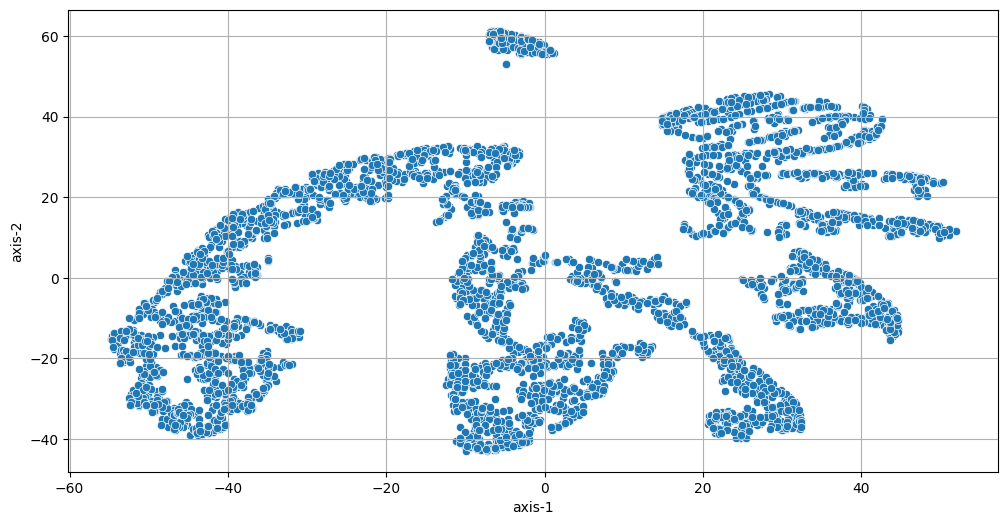

In [38]:
# формируем датафрейм
rfm_table_processed = pd.DataFrame(
    rfm_table_processed, 
    columns=['axis-1', 'axis-2'], 
)

get_scatterplot(rfm_table_processed, True)

Как и ожидалось от *t-SNE*, алгоритм сгруппировал наиболее похожие объекты в подобие кластеров, причём эти кластеры легко определить.

Теперь давайте воспользуемся алгоритмами кластеризации, чтобы сформировать новые сегменты клиентов.

### Задание 6.2

Попробуем воспользоваться методом *k-means*.

Подберите оптимальное количество кластеров для метода *k-means* с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно.

В качестве значения параметра **random_state** возьмите число **42**. Остальные параметры оставьте по умолчанию.

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ **округлите до двух знаков после точки-разделителя**.

,metric,silhouette_score
4,0.484495,7


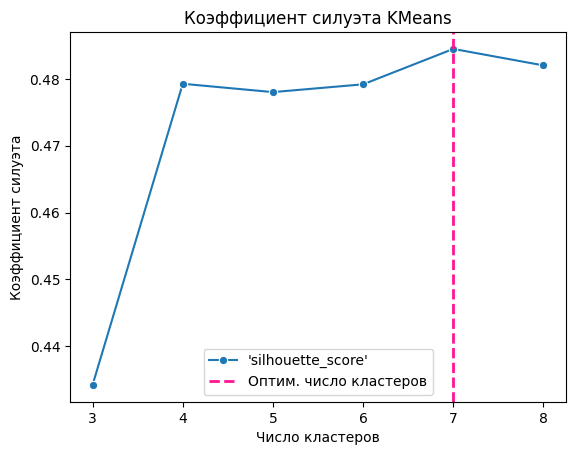

In [39]:
# формируем данные с помощью функции
si_6_2 = get_opt_metric_coef(
    'kmeans', 'si', 3, 8, rfm_table_processed
)
si_6_2

### Задание 6.3

Попробуем воспользоваться *EM*-алгоритом. 

Подберите оптимальное количество кластеров для *EM*-алгоритма (*GaussianMixture*) с помощью коэффициента силуэта, перебирая возможные значения от 3 до 8 включительно. 

В качестве значения параметра **random_state** возьмите число **42**. Остальные параметры оставьте по умолчанию.

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ **округлите до двух знаков после точки-разделителя**.

,metric,silhouette_score
1,0.468827,4


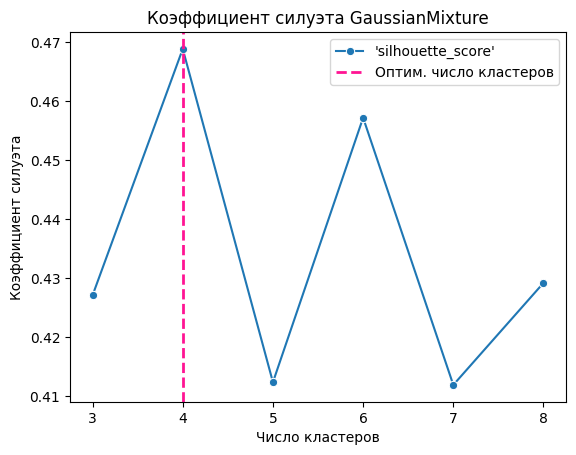

In [40]:
get_opt_metric_coef(
    'em', 'si', 3, 8, rfm_table_processed
)

### Задание 6.4

Наконец, попробуем воспользоваться алгоритмом алгомеративной кластеризации (*AgglomerativeClustering*).

Подберите оптимальное количество кластеров для алгоритма агломеративной кластеризации с помощью коэффициента силуэта, перебирая возможные значения от 2 до 8 включительно. 

Все параметры, за исключением числа кластеров, оставьте по умолчанию.

1) Судя по полученным результатам, какое количество кластеров лучше всего взять?

2) Чему равно максимальное значение коэффициента силуэта? Ответ **округлите до двух знаков после точки-разделителя**.

,metric,silhouette_score
6,0.479046,8


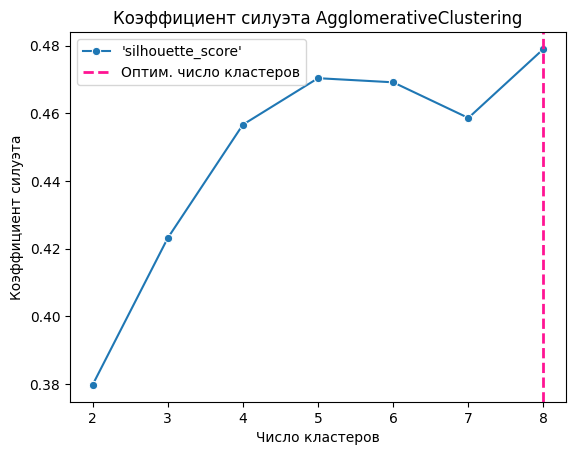

In [41]:
get_opt_metric_coef(
    'aggl', 'si', 2, 8, rfm_table_processed
)

### Задание 6.5

Давайте посмотрим на распределение кластеров.

1) Сначала нужно определить лучшую модель. Для какой модели с оптимальным количеством кластеров коэффициент силуэта наибольший?

    * ***K-Means*** (True)

    * *GaussianMixture*

    * *AgglomerativeClustering*
    <br><br>

2) Обучите лучшую модель с подобранным ранее количеством кластеров на декомпозированных данных. 
Сколько клиентов попало в самый большой кластер?

In [42]:
# создаём объект класса KMeans, обучаем модель, предсказываем метки классов
KM_6_5 = get_estimator('kmeans', **{'n_clusters':int(si_6_2.iloc[0, 1])})
KM_6_5_label_ = KM_6_5.fit_predict(rfm_table_processed)

# присоединяем предсказанные метки в rfm_table_cleaned
rfm_table_cleaned['KM_label'] = KM_6_5_label_

Визуализируем результаты кластеризации:

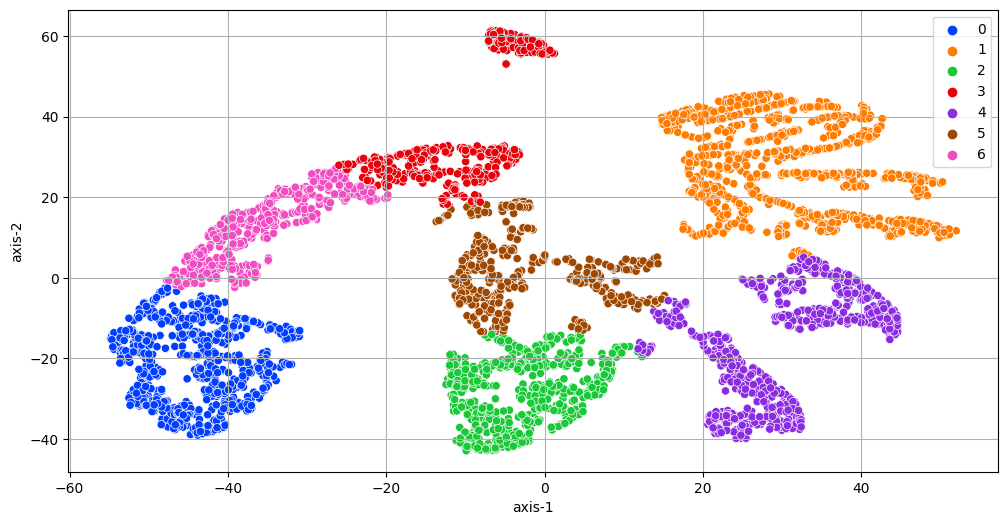

In [43]:
get_scatterplot(rfm_table_processed, True, KM_6_5_label_)

In [44]:
# ответ на вопрос
print(f"Число клиентов в самом большом кластере: " \
    f"{rfm_table_cleaned.groupby('KM_label')['Frequency'].count().nlargest(1).iloc[0]} чел.")

Число клиентов в самом большом кластере: 914 чел.


In [45]:
# прибираемся немного
del si_6_2, KM_6_5, KM_6_5_label_
gc.collect();


Итак, у нас есть 7 сегментов клиентов. Давайте попробуем составить профиль для этих сегментов. 


### Задание 6.6

Для составления профиля кластеров нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков. Для наглядности округлите все значения в столбцах до целого числа.

Чему равно максимальное среднее значение признака *Recency* в полученной таблице? Ответ **округлите до целого числа**.

In [46]:
# группируем RFM-таблицу и рассчитываем среднее
rfm_by_cluster_mean_val_6_6 = rfm_table_cleaned.groupby('KM_label').mean()
rfm_by_cluster_mean_val_6_6.astype('int')

# ответ на вопрос
print(f"Максимальное среднее значение 'Recency': " \
    f"{round(rfm_by_cluster_mean_val_6_6['Recency'].max())}")

,Recency,Frequency,Monetary
KM_label,,,
0,46,1,321
1,32,6,2416
2,40,1,613
3,313,1,261
4,40,3,995
5,195,2,670
6,181,1,273


Максимальное среднее значение 'Recency': 313


### Задание 6.7

Визуализируйте профили кластеров в виде полярной диаграммы на основе средних RFM-характеристик, вычисленных для каждого кластера.

Проанализируйте кластеры и на основе анализа сопоставьте номер кластера и его описание.

* Кластер соответствует «лояльным» клиентам, которые приносят наибольший доход, совершают покупки чаще всего, а давность их последней покупки наименьшая - **кластер 1**.

* Кластер соответствует «перспективным» клиентам, которые являются активными покупателями, но покупают не так часто и не так много, как лояльные клиенты - **кластер 4**.

* Кластер соответствует «подвисшим» клиентам, которые относительно недавно сделали несколько заказов на небольшие суммы. Потенциально эти клиенты могут быть переведены в кластер «перспективных» - **кластер 2**.

* Кластер соответствует клиентам «в зоне риска», которые несколько раз покупали товары на небольшие суммы, однако их последняя покупка была совершена более пяти месяцев назад - **кластер 5**.

* Кластер соответствует клиентам-«новичкам», которые относительно недавно сделали один заказ на небольшую сумму - **кластер 0**.

* Кластер соответствует «спящим» или «почти потерянным» клиентам, которые сделали один заказ на маленькую сумму более семи месяцев назад и больше не возвращались - **кластер 6**.

* Кластер соответствует «потерянным» клиентам, которые купили меньше всего товара, и их последняя покупка была совершена около года назад - **кластер 3**.

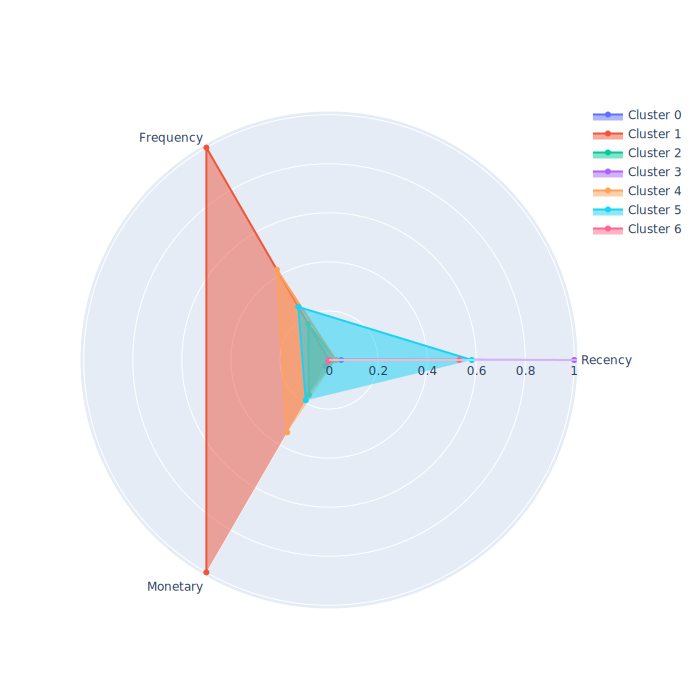

In [47]:
plot_cluster_profile(rfm_by_cluster_mean_val_6_6, './images/scatterpolar_6_7.svg', 700)

In [48]:
# прибираемся немного
del rfm_table_processed, rfm_by_cluster_mean_val_6_6
gc.collect();

## 7. RFM-кластеризация клиентов: часть 3

Мы построили модель кластеризации для части клиентов.Но как сделать предсказание сегмента для клиентов, которые не попали в обучающую выборку?

Вы, вероятно, скажете: «Воспользоваться методом **predict()**!»

Верно, однако всё не так просто.

Вспомним, что мы обучали наши алгоритмы кластеризации на сжатом с помощью *t-SNE* пространстве признаков. То есть, чтобы сделать предсказание для новых объектов, не попавших в выборку, нам необходимо будет совершить трансформацию признаков этих объектов в новое сжатое пространство. 

Однако проблема *t-SNE* заключается в том, что алгоритм непараметрический. Это значит, что он, в отличие от таких алгоритмов, как *PCA* и *SVD*, не создаёт явной функции отображения. Проще говоря, алгоритм трансформирует пространство признаков для обучающей выборки, но не запоминает, каким образом это делает. Это значит, что, передав в алгоритм новые объекты для сжатия пространства, мы получим абсолютно новое представление пространства, не имеющее отношения к тому, что мы построили для обучающей выборки. То есть произойдёт искажение, что может привести к неверным результатам кластеризации.

Именно поэтому у класса **TSNE** из библиотеки *sklearn* нет такого метода, как **transform()**, у него есть только метод **fit_transform()** — заново обучить алгоритм *t-SNE* и произвести трансформацию.

Как же тогда производить кластеризацию для новых объектов, если мы не можем сжимать размерность для новых данных?

Давайте сведём задачу кластеризации к задаче классификации. Действительно, у нас теперь есть истинные метки кластеров, а есть клиенты, которые описываются RFM-характеристиками. Давайте обучим модель, которая на основе RFM-характеристик будет предсказывать клиентский сегмент. 

### Задание 7.1

Разделите исходные данные на тренировочную и тестовую выборки в соотношении 80/20. В качестве параметра **random_state** возьмите число **42**.

Сколько клиентов попали в тестовую выборку?

In [49]:
# создаём матрицу наблюдений X и вектор правильных ответов y
X = rfm_table_cleaned.iloc[:, :-1]
y = rfm_table_cleaned.iloc[:, -1]

# разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_SEED_42)

In [50]:
# ответ на вопрос
print(f'Размер тестовой выборки: {X_test.shape[0]} чел.')

Размер тестовой выборки: 809 чел.


Дальше нам осталось только построить несколько моделей и выбрать из них лучшую. 
Мы знаем, что алгоритм *t-SNE* является нелинейным методом понижения размерности. Можно смело предположить, что линейные модели, такие как логистическая регрессия, в данной задаче нам мало чем помогут (можете убедиться в этом самостоятельно, обучив модель логистической регрессии на тренировочной выборке и оценив качество на тестовой).

Поэтому давайте сразу возьмём тяжелую артиллерию — ансамблевые алгоритмы. 


In [51]:
# прибираемся немного
del rfm_table_cleaned, X, y
gc.collect();

### Задание 7.2

Начнём со случайного леса. С помощью *GridSearchCV* организуйте перебор параметров случайного леса (*RandomForestClassifier*) на следующей сетке параметров:

```py
param_grid = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра **random_state** для модели случайного леса используйте число **42**.<br>
В качестве метрики используйте **accuracy**. **Количество фолдов** для кросс-валидации — **5**.

1) Обучите *GridSearchCV* на тренировочной выборке. Чему равна оптимальная максимальная глубина деревьев в случайном лесу?

2) С помощью лучшей модели сделайте предсказание для тестовой выборки и рассчитайте метрику *accuracy*. Ответ **округлите до трёх знаков после точки-разделителя**.

In [52]:
# задаём сетку параметров
param_gscv_rfc_7_2 = {
    'max_depth': range(5, 15),
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500]
}

# создаём объект класса GridSearchCV
GSCV_RFC_7_2 = model_selection.GridSearchCV(
    estimator=get_estimator('rfc', **{'n_jobs':CPU_ALL, 'warm_start':True}), 
    param_grid=param_gscv_rfc_7_2, 
    scoring='accuracy', 
    n_jobs=CPU_ALL, 
    cv=CV_FOLDS, 
    verbose=1
)

# обучаем модель, ищем оптимальный гиперпараметр
GSCV_RFC_7_2.fit(X_train, y_train)

# выводим результат
print(f'Наилучшие значения гиперпараметров: {GSCV_RFC_7_2.best_params_}')

# вычисляем предсказания
y_pred_test_GSCV_RFC_7_2 = GSCV_RFC_7_2.predict(X_test)

# выводим метрики
print(f'{GSCV_RFC_7_2.__class__.__name__} Accuracy score: ' \
    f'{metrics.accuracy_score(y_test, y_pred_test_GSCV_RFC_7_2):.{TOL}f}')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42,
                                              warm_start=True),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15),
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 200}
GridSearchCV Accuracy score: 0.98517


In [53]:
# прибираемся немного
del param_gscv_rfc_7_2, y_pred_test_GSCV_RFC_7_2
gc.collect();

Итак, значение метрики accuracy очень высокое, но не идеальное. Давайте попробуем его улучшить, воспользовавшись бустингом.

### Задание 7.3

С помощью *GridSearchCV* организуйте перебор параметров градиентного бустинга (*GradientBoostingClassifier*) на следующей сетке параметров:

```py
param_grid = {
    'max_depth': range(5, 10),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}
```

В качестве параметра **random_state** для модели градиентного бустинга используйте число **42**.<br>
В качестве метрики используйте **accuracy**. **Количество фолдов** для кросс-валидации — **5**. 

1) Обучите *GridSearchCV* на тренировочной выборке. Чему равна оптимальная максимальная глубина деревьев в градиентном бустинге?

2) С помощью лучшей модели сделайте предсказание для тестовой выборки и рассчитайте метрику *accuracy*. Ответ **округлите до трёх знаков после точки-разделителя**.

In [54]:
# задаём сетку параметров
param_gscv_gbc_7_3 = {
    'max_depth': range(5, 10),
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 500]
}

# создаём объект класса GridSearchCV
GSCV_GBC_7_3 = model_selection.GridSearchCV(
    estimator=get_estimator('gbc', **{'warm_start':True}), 
    param_grid=param_gscv_gbc_7_3, 
    scoring='accuracy', 
    n_jobs=CPU_ALL, 
    cv=CV_FOLDS, 
    verbose=1
)

# обучаем модель, ищем оптимальный гиперпараметр
GSCV_GBC_7_3.fit(X_train, y_train)

# выводим результат
print(f'Наилучшие значения гиперпараметров: {GSCV_GBC_7_3.best_params_}')

# вычисляем предсказания
y_pred_test_GSCV_GBC_7_3 = GSCV_GBC_7_3.predict(X_test)

# выводим метрики
print(f'{GSCV_GBC_7_3.__class__.__name__} Accuracy score: ' \
    f'{metrics.accuracy_score(y_test, y_pred_test_GSCV_GBC_7_3):.{TOL}f}')

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(random_state=42,
                                                  warm_start=True),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': range(5, 10),
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

Наилучшие значения гиперпараметров: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
GridSearchCV Accuracy score: 0.98888


In [55]:
# прибираемся немного
del param_gscv_gbc_7_3, y_pred_test_GSCV_GBC_7_3
del X_train, X_test, y_train, y_test
gc.collect();

Отлично, мы справились с проблемой непараметричности *t-SNE* и смогли перейти от решения задачи кластеризации к задаче классификации. Теперь у нас есть модель, которая на основе RFM-характерик клиента автоматически определяет его сегмент.